In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

In [2]:
# Model Training Function
def model_training(X_train, y_train, X_test, y_test, cv=None, penalty=None, C=0.1, solver='lbfgs'):
    classifier = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    return cnf_matrix, y_pred

In [3]:
# Confusion Matrix Plotting Function
def get_confusion_matrix(cnf_matrix):
    class_names = [0, 1]  # number of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

## Diabetes Dataset

In [5]:
# Read and Display the Diabetes Dataset
df = pd.read_csv("/content/diabetes.csv")
print("CSV File Shape")
print(df.shape)
df.head()

CSV File Shape
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Splitting Features and Labels
X = df.iloc[:, :-1].values   # All columns except the last one (features)
Y = df.iloc[:, -1].values    # Last column (target)

In [7]:
# Standardizing the Features
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [8]:
# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Problem 1:

In [9]:
# Train & Evaluate Logistic Regression Model
cnf_matrix, Y_pred = model_training(X_train, y_train, X_test, y_test, penalty=None)

In [10]:
def get_results(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1-score:", metrics.f1_score(y_test, y_pred))
    return acc * 100

# Print Evaluation Metrics
acc_1 = get_results(y_test, Y_pred)

Accuracy: 0.7727272727272727
Precision: 0.6851851851851852
Recall: 0.6727272727272727
F1-score: 0.6788990825688074


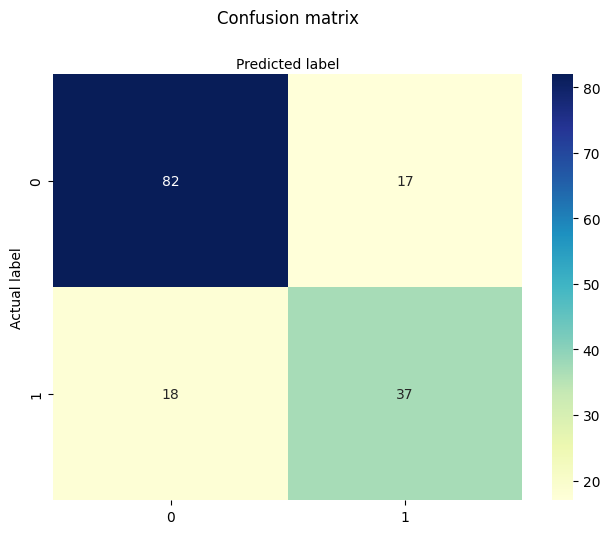

In [11]:
# Display Confusion Matrix
get_confusion_matrix(cnf_matrix)

Cancer Dataset

In [12]:
import pandas as pd

# Load CSV file
df = pd.read_csv("/content/cancer.csv")
print("CSV Shape:", df.shape)
df.head()

CSV Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# Drop non-numeric 'id' and 'diagnosis' from features
X = df.drop(['id', 'diagnosis'], axis=1).values

# Encode 'diagnosis' (M = 1, B = 0)
Y = df['diagnosis'].map({'M': 1, 'B': 0}).values

In [14]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [15]:
# Split and Scale the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Problem 2.1

In [16]:
# Train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-Score: 0.9647058823529412


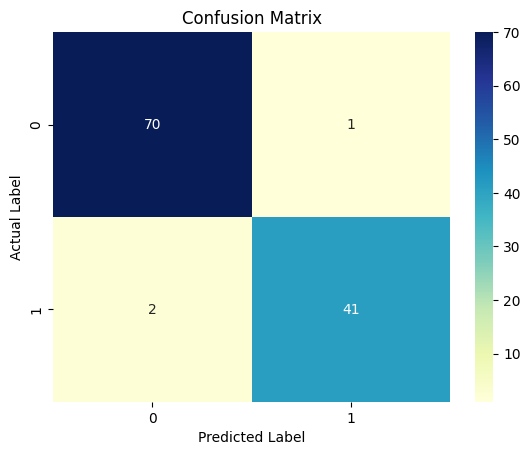

In [18]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Problem 2.2

In [20]:
# Add the weight penalty and repeat the training
cnf_matrix_2_b, y_pred_2_b = model_training(
    X_train, y_train, X_test, y_test,
    penalty='l2', C=10, solver='lbfgs'
)

Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1-score: 0.9655172413793104


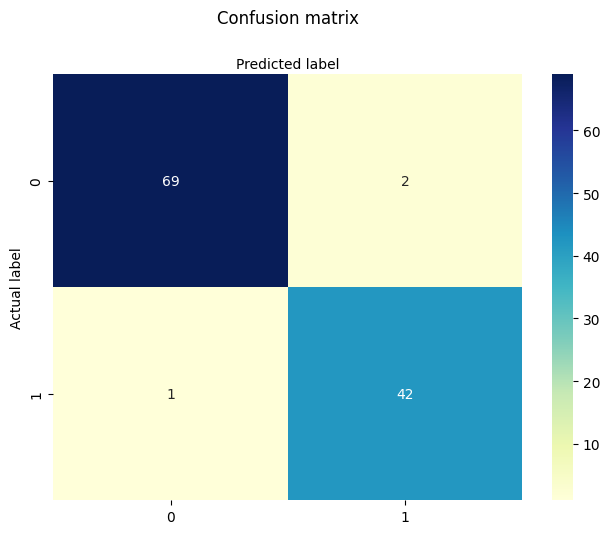

In [21]:
# Plot Confusion Matrix
acc_2_b = get_results(y_test, y_pred_2_b)
get_confusion_matrix(cnf_matrix_2_b)

Problem 3:

In [22]:
# Model Training
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def model_training_NB(X_train, y_train, X_test, y_test):
    classifier = GaussianNB()
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    return cnf_matrix, y_pred

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-score: 0.9523809523809523


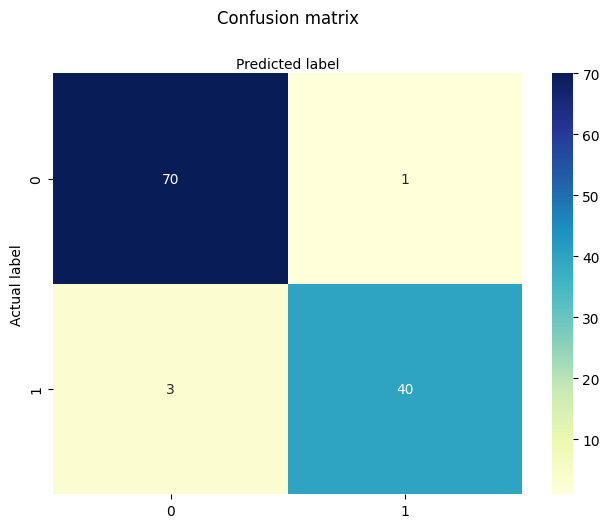

In [23]:
# Train and evaluate the model
cnf_matrix_3, y_pred_3 = model_training_NB(X_train, y_train, X_test, y_test)
acc_3 = get_results(y_test, y_pred_3)
get_confusion_matrix(cnf_matrix_3)

Problem 4 & 5:

In [24]:
# PCA + Classification
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_results(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)
    return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]

In [25]:
# Logistic Regression with PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def logist_model_training_pca(X, Y):
    n = X.shape[1]
    acc_list = []
    recall_list = []
    precision_list = []
    f1score_list = []
    k_list = []

    for i in range(n):
        print("K = " + str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = LogisticRegression(random_state=9)
        y_pred = classifier.fit(X_train, y_train).predict(X_test)

        re = get_results(y_test, y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)

    high_acc = max(acc_list)
    high_acc_k = acc_list.index(high_acc) + 1
    print("------------------------------")
    print("Highest Classification Accuracy Achieved: " + str(high_acc) + " for K number = " + str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list

In [26]:
# Naive Bayes with PCA
from sklearn.naive_bayes import GaussianNB

def GaussianNB_model_training_pca(X, Y):
    n = X.shape[1]
    acc_list = []
    recall_list = []
    precision_list = []
    f1score_list = []
    k_list = []

    for i in range(n):
        print("K = " + str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = GaussianNB()
        y_pred = classifier.fit(X_train, y_train).predict(X_test)

        re = get_results(y_test, y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)

    high_acc = max(acc_list)
    high_acc_k = acc_list.index(high_acc) + 1
    print("------------------------------")
    print("Highest Classification Accuracy Achieved: " + str(high_acc) + " for K number = " + str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list

In [27]:
# Plotting the Results
import matplotlib.pyplot as plt

def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title("Plotting classification accuracy, precision, recall and F1-score over a different number of Ks")
    plt.xlabel("K")
    plt.ylabel("Value")
    plt.show()

In [28]:
# Loading and Preprocessing Cancer Dataset
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CSV file
df = pd.read_csv("/content/cancer.csv")
print("CSV Shape:", df.shape)
df.head()

# Drop ID and diagnosis column, and extract labels
X = df.drop(['id', 'diagnosis'], axis=1).values
Y = df['diagnosis'].map({'M': 1, 'B': 0}).values

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

CSV Shape: (569, 33)


Problem 4:

In [29]:
# perform PCA + logistic regression
k_list, acc_list, precision_list, recall_list, f1score_list = logist_model_training_pca(X, Y)

K = 1
Accuracy: 0.9122807017543859
Precision: 0.90625
Recall: 0.8055555555555556
F1-Score: 0.8529411764705882
K = 2
Accuracy: 0.9473684210526315
Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1-Score: 0.9166666666666666
K = 3
Accuracy: 0.956140350877193
Precision: 0.9428571428571428
Recall: 0.9166666666666666
F1-Score: 0.9295774647887324
K = 4
Accuracy: 0.9473684210526315
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-Score: 0.918918918918919
K = 5
Accuracy: 0.9473684210526315
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-Score: 0.918918918918919
K = 6
Accuracy: 0.9473684210526315
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-Score: 0.918918918918919
K = 7
Accuracy: 0.9473684210526315
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-Score: 0.918918918918919
K = 8
Accuracy: 0.9473684210526315
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-Score: 0.918918918918919
K = 9
Accuracy: 0.9473684210526315
Precision: 0.8

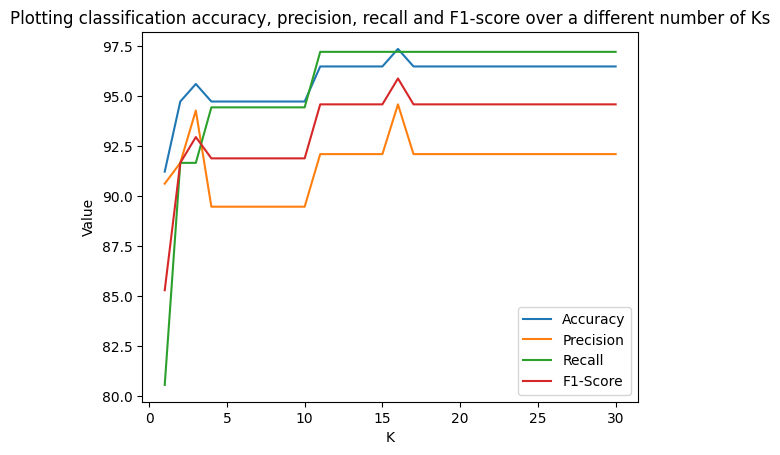

In [30]:
# Plot The Graph
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

Problem 5: Gaussian Naive Bayes with PCA – Performance Evaluation

In [ ]:
# Principal Component Analysis (PCA) with Gaussian Naive Bayes (GNB)
k_list, acc_list, precision_list, recall_list, f1score_list = GaussianNB_model_training_pca(X, Y)

K = 1
Accuracy: 0.9122807017543859
Precision: 0.90625
Recall: 0.8055555555555556
F1-Score: 0.8529411764705882
K = 2
Accuracy: 0.8947368421052632
Precision: 0.9
Recall: 0.75
F1-Score: 0.8181818181818182
K = 3
Accuracy: 0.868421052631579
Precision: 0.8387096774193549
Recall: 0.7222222222222222
F1-Score: 0.7761194029850746
K = 4
Accuracy: 0.9035087719298246
Precision: 0.8787878787878788
Recall: 0.8055555555555556
F1-Score: 0.8405797101449275
K = 5
Accuracy: 0.9122807017543859
Precision: 0.8823529411764706
Recall: 0.8333333333333334
F1-Score: 0.8571428571428571
K = 6
Accuracy: 0.9122807017543859
Precision: 0.90625
Recall: 0.8055555555555556
F1-Score: 0.8529411764705882
K = 7
Accuracy: 0.9122807017543859
Precision: 0.90625
Recall: 0.8055555555555556
F1-Score: 0.8529411764705882
K = 8
Accuracy: 0.8947368421052632
Precision: 0.8529411764705882
Recall: 0.8055555555555556
F1-Score: 0.8285714285714286
K = 9
Accuracy: 0.9035087719298246
Precision: 0.8571428571428571
Recall: 0.8333333333333334
F1-

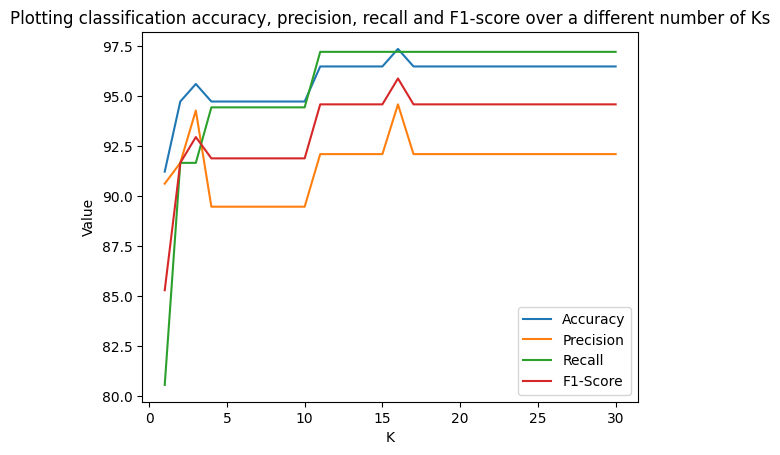

In [31]:
# Plot The Graph
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)